We explore one of the ready-made networks available: Zachary's Karate club. This network represents the friendships (edges) between memebers(nodes) of a karate club studied between 1970 and 1972. This club has been of long interest because it eventually split into 2 different clubs after a disagtreement between the instructor and the club president. In the original study, Zachary used the network structure to predict which members would join which of the two clubs with near-perfect accuracy

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

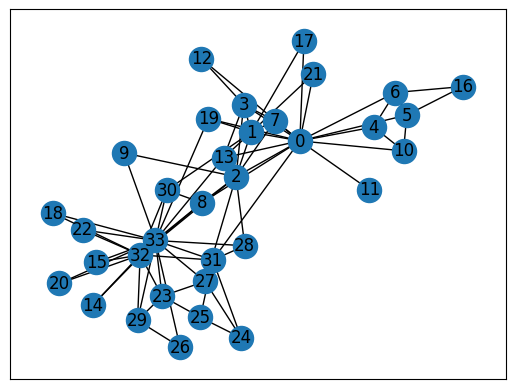

In [2]:
G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_pos)

The visualization is then pre-calculated using spring_layout() and stored in karate_pos. The spring_layout method tries to place nodes closer together if they are connected by an edge

In Zachary's paper, the node with the 0 ID was identified as the club instructor

In [3]:
mr_hi = 0
mr_hi in G

True

In [4]:
G.has_node(mr_hi)

True

In [5]:
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

## Adding attributes to nodes and edges

In [6]:
member_club = [
0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1]


for node_id in G.nodes():
    G.nodes[node_id]['club'] = member_club[node_id]

# it is now possible to check the value of that attribute for individual nodes
print(G.nodes[mr_hi])

{'club': 0}


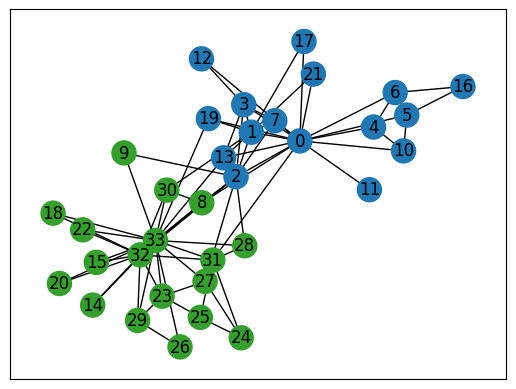

In [7]:
node_colors = [
    "#1f78b4" if G.nodes[v]['club'] == 0
    else "#33a02c" for v in G
]

nx.draw_networkx(G, karate_pos, label=True, node_color = node_colors)

Adding attributes to edges works much like it does for nodes. In a G network, an edge's atrributes are stored in the dict at G.edges[v,w], where v and w are the node IDs of the edge points.
Some of the edges in the karate club network connect members who joined the same splinter club, while other edges connect members from different splinter clubs. This information can be stored in the Graph class using edge attributes

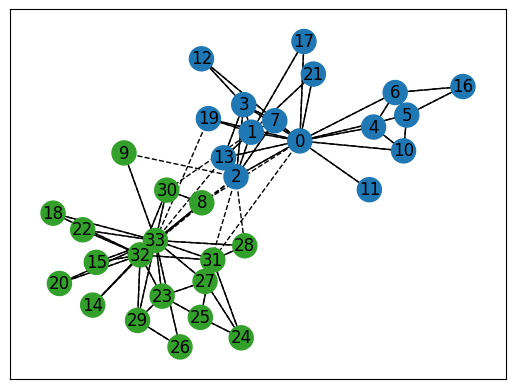

In [12]:
# iterate through all edges
for v, w in G.edges:
    # compare club property of edge endpoints and set edge "internal" property to True if they match
    if G.nodes[v]["club"] == G.nodes[w]["club"]:
        G.edges[v,w]["internal"] = True

    else:
        G.edges[v,w]["internal"] = False


# use solid lines for internal edges and dashed lines for external ones
internal = [e for e in G.edges if G.edges[e]["internal"]]
external = [e for e in G.edges if ~G.edges[e]["internal"]]

# networkx can only draw one line style ata atime, so multiple line styles require nodes, edges and labels drawn separately
# first, we draw the nodes and node labels
nx.draw_networkx_nodes(G, karate_pos, node_color=node_colors)
nx.draw_networkx_labels(G, karate_pos)

# Draw the internal and external edges separately
# internal edges as solid lines and external edges as dashed lines
nx.draw_networkx_edges(G, karate_pos, edgelist=internal)
nx.draw_networkx_edges(G, karate_pos, edgelist=external, style="dashed")

## Adding Edge Weights
The karate club network doesn't have any additional information about the strength of the deges, but there are relevant properties of those edges that can be calculated, such as **Tie strength**. This increases with the number of neighbors that two nodes have in common. It is motivated by the observation that closer friends tend to have more friends in common. The following code calculates the tie strength using the neighbors() method to find node neighbors, and python sets to compute the number of neighbors in common

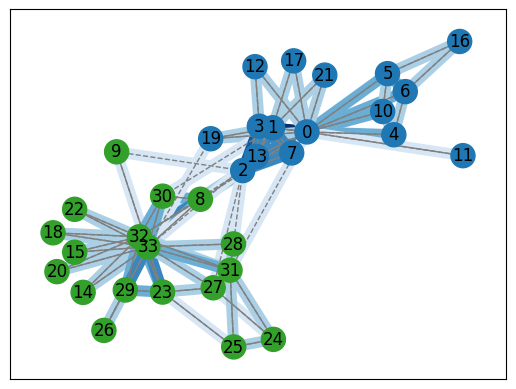

In [17]:
def tie_strength(G, v, w):
    # Get neighbors of nodes v and w in G
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    # return size of the set intersection
    return 1 + len(v_neighbors & w_neighbors)


# calculate weight for each edge
for v, w in G.edges:
    G.edges[v,w]["weight"] = tie_strength(G, v, w)
    # store in a list
    edge_weights = [G.edges[v,w]["weight"] for v, w in G.edges]


# let us use spring layout to push strongly connected nodes even closer
weighted_pos = nx.spring_layout(G, pos=karate_pos, k=0.3, weight="weight")

# draw the network
nx.draw_networkx(
    G,
    weighted_pos,
    width=8,
    node_color = node_colors,
    edge_color=edge_weights,
    edge_cmap = plt.cm.Blues,
    edge_vmin = 0,
    edge_vmax=6
)

# draw dashed /solid lines
nx.draw_networkx_edges(
    G,
    weighted_pos,
    edgelist=internal,
    edge_color="gray"
)
nx.draw_networkx_edges(
    G,
    weighted_pos,
    edgelist=external,
    style="dashed",
    edge_color="gray"
)

## The DiGraph Class - When Direction matters
We will use another example: The friendship among adolescent stidents in a Dutch classroom, collected by Andrea Knecht. This friendship network differes from the karate club because the students were asked to list their friends, but there was no requirement that their friends listed them in return

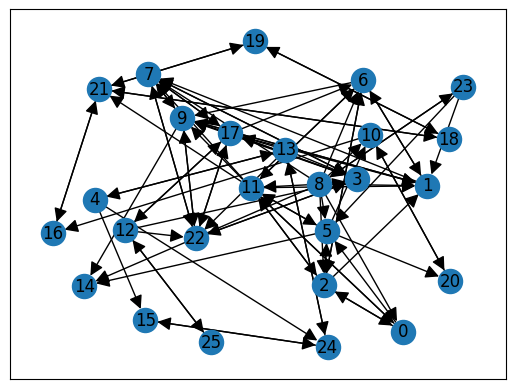

In [22]:
G = nx.read_gexf("../data/knecht2008/klas12b-net-1.gexf")
student_pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx(G, student_pos, arrowsize=20)

Incoming edges connect a node to its **predecessors**, while outgoing edges connect a node to its **successors**. The DiGraph class still has a **neighbors()** method, but it behaves a little differently, and in fact, returns an iterator of successor nodes only

In [31]:
list(G.neighbors('0'))

['2', '5', '11']

In [32]:
list(G.successors('0'))

['2', '5', '11']

In [33]:
list(G.predecessors('0'))

['2', '11', '8']